# Dissertation Images and Calculations: $\displaystyle \frac{d\sigma}{d\Omega}$

In [1]:
%pylab inline
import scipy
StartTime = datetime.datetime.now()

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.interpolate import interp1d
from scipy.special import eval_legendre
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandasql import sqldf
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [3]:
# The most common set of integration points
quadpoints = '["75 40 40 40 40 25 25 25", "75 40 40 40 40 25 25 25", "100 65 45 65 45 45 45 45", "115 65 45 65 60 45 45 45", "100 65 45 65 45 45 45 45"]'

# For differential cross sections
Ntheta = 50

In [4]:
newsteelblue = '#397BB2'
newcoral = '#FF9670'
#singletcolor = 'steelblue'
#tripletcolor = 'coral'
#combinedcolor = '#99CC66'
singletcolor = newsteelblue
tripletcolor = newcoral
combinedcolor = '#52423A'

#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rcParams['text.latex.preamble'] = [r'\boldmath']  # Set for bold LaTeX symbols

params = {'backend': 'ps',
          'axes.facecolor': 'white',
          'axes.labelsize': 19,
          'axes.labelcolor': 'black',
          'axes.edgecolor': '#bcbcbc',
          'axes.unicode_minus': False,
          'figure.figsize': [12, 8],
          #'figure.figsize': [10, 6.7],
          #'font.family': 'sans-serif',
          'font.size': 18,
          'font.family': 'serif',
          'font.serif': ['Palatino'],
          'grid.color': '#555555',
          'legend.fontsize': 14,
          'lines.linewidth': 1.5,
          'legend.loc': 'best',
          'legend.numpoints': 1,
          'legend.fancybox': True,
          'legend.shadow': True,
          'text.usetex': True,
          'xtick.color': 'black',
          'xtick.labelsize': 18,
          'xtick.major.pad': 6,
          'ytick.color': 'black',
          'ytick.labelsize': 18,
          'ytick.major.pad': 6,
         }
pylab.rcParams.update(params)

dashstyle1 = [7, 1, 3, 1]  # 7 points on, 1 point off, 3 points on, 1 point off
dashstyle2 = [7, 1, 1, 1]  # 7 points on, 1 point off, 1 points on, 1 point off


def FixPlot(p):
    ax = p.gca()
    ax.xaxis.set_minor_locator(MultipleLocator( (p.xticks()[0][1]-p.xticks()[0][0]) / 2.0 ))
    ax.yaxis.set_minor_locator(MultipleLocator( (p.yticks()[0][1]-p.yticks()[0][0]) / 2.0 ))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    p.grid(b=True, which='major', color='#999999', linestyle=':')
    p.grid(b=True, which='minor', color='#eeeeee', linestyle=':')
    ax.set_axisbelow(True)

## Connecting to Database and Getting Entries

In [5]:
n1S = 1505  # S-wave singlet
n1P = 1000  # P-wave singlet
n1D1 = 916  # D-wave singlet
n1D2 = 913  # D-wave singlet
n1F1 = 385  # F-wave singlet
n1F2 = 462  # F-wave singlet
n1F = 462   # F-wave singlet (original set)
n1G1 = 462   # G-wave singlet
n1G2 = 462   # G-wave singlet
n1H1 = 462   # H-wave singlet
n1H2 = 462   # H-wave singlet

n3S = 1633  # S-wave triplet
n3P = 1000  # P-wave triplet
n3D1 = 919  # D-wave triplet
n3D2 = 913  # D-wave triplet
n3F1 = 385  # F-wave triplet
n3F2 = 462  # F-wave triplet
n3F = 462   # F-wave triplet (original set)
n3G1 = 462   # G-wave triplet
n3G2 = 462   # G-wave triplet
n3H1 = 462   # H-wave triplet
n3H2 = 462   # H-wave triplet

kohnmethod = "smatrix"  # The Kohn method that we are plotting

In [6]:
%run "Database Functions.py"

In [7]:
# Choose all entries for each of the partial waves
#  Singlet entries
entries1S = GetKappaTablenames(cursor, "lvalue=0 AND istriplet=0 AND mu=0.9 AND alpha=0.586 AND beta=0.58 AND gamma=1.093 AND omega=7 AND resorted=FALSE AND numterms=1505", quadpoints, 0, 0.866)
entries1P = GetKappaTablenames(cursor, "lvalue=1 AND istriplet=0 AND mu=0.9 AND alpha=0.397 AND beta=0.376 AND gamma=0.962 AND omega=7 AND resorted=FALSE", quadpoints, 0, 0.866)
entries1D1 = GetKappaTablenames(cursor, "lvalue=2 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=6 AND resorted=FALSE", quadpoints, 0, 0.866)
entries1D2 = GetKappaTablenames(cursor, "lvalue=2 AND istriplet=0 AND mu=0.7 AND alpha=0.6 AND beta=0.368 AND gamma=0.976 AND omega=6 AND resorted=FALSE AND numterms>=913", quadpoints, 0, 0.866)
entries1F1 = GetKappaTablenames(cursor, "lvalue=3 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=385", quadpoints, 0, 0.866)
entries1F2 = GetKappaTablenames(cursor, "lvalue=3 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", quadpoints, 0, 0.866)
entries1G1 = GetKappaTablenames(cursor, "lvalue=4 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=462 AND shielding=9", quadpoints, 0, 0.866)
entries1G2 = GetKappaTablenames(cursor, "lvalue=4 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", quadpoints, 0, 0.866)
entries1H1 = GetKappaTablenames(cursor, "lvalue=5 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=462", quadpoints, 0, 0.866)
entries1H2 = GetKappaTablenames(cursor, "lvalue=5 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", quadpoints, 0, 0.866)
#  Triplet entries
entries3S = GetKappaTablenames(cursor, "lvalue=0 AND istriplet=1 AND mu=0.9 AND alpha=0.323 AND beta=0.334 AND gamma=0.975 AND omega=7 AND resorted=FALSE", quadpoints, 0, 0.866)
entries3P = GetKappaTablenames(cursor, "lvalue=1 AND istriplet=1 AND mu=0.9 AND alpha=0.310 AND beta=0.311 AND gamma=0.995 AND omega=7 AND resorted=FALSE", quadpoints, 0, 0.866)
entries3D1 = GetKappaTablenames(cursor, "lvalue=2 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=6 AND resorted=FALSE", quadpoints, 0, 0.866)
entries3D2 = GetKappaTablenames(cursor, "lvalue=2 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=6 AND resorted=FALSE AND numterms>=913", quadpoints, 0, 0.866)
entries3F1 = GetKappaTablenames(cursor, "lvalue=3 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=385", quadpoints, 0, 0.866)
entries3F2 = GetKappaTablenames(cursor, "lvalue=3 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", quadpoints, 0, 0.866)
entries3G1 = GetKappaTablenames(cursor, "lvalue=4 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462 AND shielding=9", quadpoints, 0, 0.866)
entries3G2 = GetKappaTablenames(cursor, "lvalue=4 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", quadpoints, 0, 0.866)
entries3H1 = GetKappaTablenames(cursor, "lvalue=5 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", quadpoints, 0, 0.866)
entries3H2 = GetKappaTablenames(cursor, "lvalue=5 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", quadpoints, 0, 0.866)

# Now do the same for the SLS matrix elements
#@TODO: Combine with the above?
# Singlet entries
sls1S, cross_sls1S = GetSLS(cursor, "lvalue=0 AND istriplet=0 AND mu=0.9 AND alpha=0.586 AND beta=0.58 AND gamma=1.093 AND omega=7 AND resorted=FALSE AND numterms=1505", 0, quadpoints, 0, 0.866)
sls1P, cross_sls1P = GetSLS(cursor, "lvalue=1 AND istriplet=0 AND mu=0.9 AND alpha=0.397 AND beta=0.376 AND gamma=0.962 AND omega=7 AND resorted=FALSE", 1, quadpoints, 0, 0.866)
sls1D1, cross_sls1D1 = GetSLS(cursor, "lvalue=2 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=6 AND resorted=FALSE", 2, quadpoints, 0, 0.866)
sls1D2, cross_sls1D2 = GetSLS(cursor, "lvalue=2 AND istriplet=0 AND mu=0.7 AND alpha=0.6 AND beta=0.368 AND gamma=0.976 AND omega=6 AND resorted=FALSE AND numterms>=913", 2, quadpoints, 0, 0.866)
sls1F1, cross_sls1F1 = GetSLS(cursor, "lvalue=3 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=385", 3, quadpoints, 0, 0.866)
sls1F2, cross_sls1F2 = GetSLS(cursor, "lvalue=3 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", 3, quadpoints, 0, 0.866)
sls1G1, cross_sls1G1 = GetSLS(cursor, "lvalue=4 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=462 AND shielding=9", 3, quadpoints, 0, 0.866)
sls1G2, cross_sls1G2 = GetSLS(cursor, "lvalue=4 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", 3, quadpoints, 0, 0.866)
sls1H1, cross_sls1H1 = GetSLS(cursor, "lvalue=5 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=462", 3, quadpoints, 0, 0.866)
sls1H2, cross_sls1H2 = GetSLS(cursor, "lvalue=5 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", 3, quadpoints, 0, 0.866)
#  Triplet entries
sls3S, cross_sls3S = GetSLS(cursor, "lvalue=0 AND istriplet=1 AND mu=0.9 AND alpha=0.323 AND beta=0.334 AND gamma=0.975 AND omega=7 AND resorted=FALSE", 1, quadpoints, 0, 0.866)
sls3P, cross_sls3P = GetSLS(cursor, "lvalue=1 AND istriplet=1 AND mu=0.9 AND alpha=0.310 AND beta=0.311 AND gamma=0.995 AND omega=7 AND resorted=FALSE", 1, quadpoints, 0, 0.866)
sls3D1, cross_sls3D1 = GetSLS(cursor, "lvalue=2 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=6 AND resorted=FALSE", 2, quadpoints, 0, 0.866)
sls3D2, cross_sls3D2 = GetSLS(cursor, "lvalue=2 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=6 AND resorted=FALSE AND numterms>=913", 2, quadpoints, 0, 0.866)
sls3F1, cross_sls3F1 = GetSLS(cursor, "lvalue=3 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=385", 3, quadpoints, 0, 0.866)
sls3F2, cross_sls3F2 = GetSLS(cursor, "lvalue=3 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", 3, quadpoints, 0, 0.866)
sls3G1, cross_sls3G1 = GetSLS(cursor, "lvalue=4 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462 AND shielding=9", 3, quadpoints, 0, 0.866)
sls3G2, cross_sls3G2 = GetSLS(cursor, "lvalue=4 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", 3, quadpoints, 0, 0.866)
sls3H1, cross_sls3H1 = GetSLS(cursor, "lvalue=5 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", 3, quadpoints, 0, 0.866)
sls3H2, cross_sls3H2 = GetSLS(cursor, "lvalue=5 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", 3, quadpoints, 0, 0.866)

In [8]:
# Obtains the phase shifts at the desired number of terms for each partial wave
#  Singlet
print "Loading singlet phase shifts"
kappa1S, E1S, phase1S, cross1S = GetPhaseShifts(cursor, entries1S, n1S, 0, kohnmethod)
kappa1P, E1P, phase1P, cross1P = GetPhaseShifts(cursor, entries1P, n1P, 1, kohnmethod)
kappa1D1, E1D1, phase1D1, cross1D1 = GetPhaseShifts(cursor, entries1D1, n1D1, 2, kohnmethod)
kappa1D2, E1D2, phase1D2, cross1D2 = GetPhaseShifts(cursor, entries1D2, n1D2, 2, kohnmethod)
print "Halfway through loading singlet phase shifts"
kappa1F1, E1F1, phase1F1, cross1F1 = GetPhaseShifts(cursor, entries1F1, n1F1, 3, kohnmethod)
kappa1F2, E1F2, phase1F2, cross1F2 = GetPhaseShifts(cursor, entries1F2, n1F2, 3, kohnmethod)
kappa1G1, E1G1, phase1G1, cross1G1 = GetPhaseShifts(cursor, entries1G1, n1G1, 4, kohnmethod)
kappa1G2, E1G2, phase1G2, cross1G2 = GetPhaseShifts(cursor, entries1G2, n1G2, 4, kohnmethod)
kappa1H1, E1H1, phase1H1, cross1H1 = GetPhaseShifts(cursor, entries1H1, n1H1, 5, kohnmethod)
kappa1H2, E1H2, phase1H2, cross1H2 = GetPhaseShifts(cursor, entries1H2, n1H2, 5, kohnmethod)
#kappa1FFull, E1FFull, phase1FFull, cross1FFull = GetPhaseShifts(cursor, entries1FFull, n1F, 3, kohnmethod)
print "Loading triplet phase shifts"
#  Triplet
kappa3S, E3S, phase3S, cross3S = GetPhaseShifts(cursor, entries3S, n3S, 0, kohnmethod)
kappa3P, E3P, phase3P, cross3P = GetPhaseShifts(cursor, entries3P, n3P, 1, kohnmethod)
kappa3D1, E3D1, phase3D1, cross3D1 = GetPhaseShifts(cursor, entries3D1, n3D1, 2, kohnmethod)
kappa3D2, E3D2, phase3D2, cross3D2 = GetPhaseShifts(cursor, entries3D2, n3D2, 2, kohnmethod)
print "Halfway through loading triplet phase shifts"
kappa3F1, E3F1, phase3F1, cross3F1 = GetPhaseShifts(cursor, entries3F1, n3F1, 3, kohnmethod)
kappa3F2, E3F2, phase3F2, cross3F2 = GetPhaseShifts(cursor, entries3F2, n3F2, 3, kohnmethod)
kappa3G1, E3G1, phase3G1, cross3G1 = GetPhaseShifts(cursor, entries3G1, n3G1, 4, kohnmethod)
kappa3G2, E3G2, phase3G2, cross3G2 = GetPhaseShifts(cursor, entries3G2, n3G2, 4, kohnmethod)
kappa3H1, E3H1, phase3H1, cross3H1 = GetPhaseShifts(cursor, entries3H1, n3H1, 5, kohnmethod)
kappa3H2, E3H2, phase3H2, cross3H2 = GetPhaseShifts(cursor, entries3H2, n3H2, 5, kohnmethod)
#kappa3FFull, E3FFull, phase3FFull, cross3FFull = GetPhaseShifts(cursor, entries3FFull, n3F, 3, kohnmethod)

Loading singlet phase shifts
Halfway through loading singlet phase shifts
Loading triplet phase shifts
Halfway through loading triplet phase shifts


In [9]:
# D-wave
# Singlet
kappa1D = np.concatenate((kappa1D1[kappa1D1<0.3],kappa1D2[kappa1D2>=0.3]))
E1D = np.concatenate((E1D1[kappa1D1<0.3],E1D2[kappa1D2>=0.3]))
phase1D = np.concatenate((phase1D1[kappa1D1<0.3],phase1D2[kappa1D2>=0.3]))
cross1D = np.concatenate((cross1D1[kappa1D1<0.3],cross1D2[kappa1D2>=0.3]))
sls1D = np.concatenate((sls1D1[kappa1D1<0.3],sls1D2[kappa1D2>=0.3]))
# Triplet
kappa3D = np.concatenate((kappa3D1[kappa3D1<0.3],kappa3D2[kappa3D2>=0.3]))
E3D = np.concatenate((E3D1[kappa3D1<0.3],E3D2[kappa3D2>=0.3]))
phase3D = np.concatenate((phase3D1[kappa3D1<0.3],phase3D2[kappa3D2>=0.3]))
cross3D = np.concatenate((cross3D1[kappa3D1<0.3],cross3D2[kappa3D2>=0.3]))
sls3D = np.concatenate((sls3D1[kappa3D1<0.3],sls3D2[kappa3D2>=0.3]))

# F-wave
# Singlet
kappa1F = np.concatenate((kappa1F1[kappa1F1<0.4],kappa1F2[kappa1F2>=0.4]))
E1F = np.concatenate((E1F1[kappa1F1<0.4],E1F2[kappa1F2>=0.4]))
phase1F = np.concatenate((phase1F1[kappa1F1<0.4],phase1F2[kappa1F2>=0.4]))
cross1F = np.concatenate((cross1F1[kappa1F1<0.4],cross1F2[kappa1F2>=0.4]))
sls1F = np.concatenate((sls1F1[kappa1F1<0.4],sls1F2[kappa1F2>=0.4]))
# Triplet
kappa3F = np.concatenate((kappa3F1[kappa3F1<0.4],kappa3F2[kappa3F2>=0.4]))
E3F = np.concatenate((E3F1[kappa3F1<0.4],E3F2[kappa3F2>=0.4]))
phase3F = np.concatenate((phase3F1[kappa3F1<0.4],phase3F2[kappa3F2>=0.4]))
cross3F = np.concatenate((cross3F1[kappa3F1<0.4],cross3F2[kappa3F2>=0.4]))
sls3F = np.concatenate((sls3F1[kappa3F1<0.4],sls3F2[kappa3F2>=0.4]))

# G-wave
# Singlet
kappa1G = np.concatenate((kappa1G1[kappa1G1<0.45],kappa1G2[kappa1G2>=0.45]))
E1G = np.concatenate((E1G1[kappa1G1<0.45],E1G2[kappa1G2>=0.45]))
phase1G = np.concatenate((phase1G1[kappa1G1<0.45],phase1G2[kappa1G2>=0.45]))
cross1G = np.concatenate((cross1G1[kappa1G1<0.45],cross1G2[kappa1G2>=0.45]))
sls1G = np.concatenate((sls1G1[kappa1G1<0.45],sls1G2[kappa1G2>=0.45]))
# Triplet
kappa3G = np.concatenate((kappa3G1[kappa3G1<0.45],kappa3G2[kappa3G2>=0.45]))
E3G = np.concatenate((E3G1[kappa3G1<0.45],E3G2[kappa3G2>=0.45]))
phase3G = np.concatenate((phase3G1[kappa3G1<0.45],phase3G2[kappa3G2>=0.45]))
cross3G = np.concatenate((cross3G1[kappa3G1<0.45],cross3G2[kappa3G2>=0.45]))
sls3G = np.concatenate((sls3G1[kappa3G1<0.45],sls3G2[kappa3G2>=0.45]))

# H-wave
# Singlet
kappa1H = np.concatenate((kappa1H1[kappa1H1<0.45],kappa1H2[kappa1H2>=0.45]))
E1H = np.concatenate((E1H1[kappa1H1<0.45],E1H2[kappa1H2>=0.45]))
phase1H = np.concatenate((phase1H1[kappa1H1<0.45],phase1H2[kappa1H2>=0.45]))
cross1H = np.concatenate((cross1H1[kappa1H1<0.45],cross1H2[kappa1H2>=0.45]))
sls1H = np.concatenate((sls1H1[kappa1H1<0.45],sls1H2[kappa1H2>=0.45]))
# Triplet
kappa3H = np.concatenate((kappa3H1[kappa3H1<0.45],kappa3H2[kappa3H2>=0.45]))
E3H = np.concatenate((E3H1[kappa3H1<0.45],E3H2[kappa3H2>=0.45]))
phase3H = np.concatenate((phase3H1[kappa3H1<0.45],phase3H2[kappa3H2>=0.45]))
cross3H = np.concatenate((cross3H1[kappa3H1<0.45],cross3H2[kappa3H2>=0.45]))
sls3H = np.concatenate((sls3H1[kappa3H1<0.45],sls3H2[kappa3H2>=0.45]))

For the higher partial waves, the very low $\kappa$ runs fail, because the phase shifts are very nearly 0.

In [10]:
def AddLowKappa(kappa, energy, phase, cross, sls=None):
    kappa = np.insert(kappa, 0, 0.0)
    energy = np.insert(energy, 0, 0.0)
    phase = np.insert(phase, 0, 0.0)
    cross = np.insert(cross, 0, 0.0)
    if sls == None:
        return [kappa, energy, phase, cross]
    sls = np.insert(sls, 0, 0.0)
    return [kappa, energy, phase, cross, sls]

# Do I even need to do anything with the return values? Does it return by reference or a copy?
kappa1P, E1P, phase1P, cross1P, sls1P = AddLowKappa(kappa1P, E1P, phase1P, cross1P, sls1P)
kappa1D, E1D, phase1D, cross1D, sls1D = AddLowKappa(kappa1D, E1D, phase1D, cross1D, sls1D)
kappa1F, E1F, phase1F, cross1F, sls1F = AddLowKappa(kappa1F, E1F, phase1F, cross1F, sls1F)
kappa1G, E1G, phase1G, cross1G, sls1G = AddLowKappa(kappa1G, E1G, phase1G, cross1G, sls1G)
kappa1H, E1H, phase1H, cross1H, sls1H = AddLowKappa(kappa1H, E1H, phase1H, cross1H, sls1H)
kappa3P, E3P, phase3P, cross3P, sls3P = AddLowKappa(kappa3P, E3P, phase3P, cross3P, sls3P)
kappa3D, E3D, phase3D, cross3D, sls3D = AddLowKappa(kappa3D, E3D, phase3D, cross3D, sls3D)
kappa3F, E3F, phase3F, cross3F, sls3F = AddLowKappa(kappa3F, E3F, phase3F, cross3F, sls3F)
kappa3G, E3G, phase3G, cross3G, sls3G = AddLowKappa(kappa3G, E3G, phase3G, cross3G, sls3G)
kappa3H, E3H, phase3H, cross3H, sls3H = AddLowKappa(kappa3H, E3H, phase3H, cross3H, sls3H)
#kappa1FFull, E1FFull, phase1FFull, cross1FFull, sls1FFull = AddLowKappa(kappa1FFull, E1FFull, phase1FFull, cross1FFull, sls1FFull)

c:\CODING\ANACONDA\lib\site-packages\IPython\kernel\__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Are there any that still are missing the $\kappa = 0.866$ runs?

In [11]:
def AddHighKappa(kappa, energy, phase, cross, sls=None):
    kappa = np.append(kappa, 0.866)
    energy = np.append(energy, 27.21138505/4.0*0.866**2)
    phase = np.append(phase, phase[np.size(phase)-1])  # Repeat last entry
    cross = np.append(cross, cross[np.size(cross)-1])
    if sls == None:
        return [kappa, energy, phase, cross]
    sls = np.append(sls, sls[np.size(sls)-1])
    return [kappa, energy, phase, cross, sls]

kappa3D, E3D, phase3D, cross3D, sls3D = AddHighKappa(kappa3D, E3D, phase3D, cross3D, sls3D)
kappa1F, E1F, phase1F, cross1F, sls1F = AddHighKappa(kappa1F, E1F, phase1F, cross1F, sls1F)

c:\CODING\ANACONDA\lib\site-packages\IPython\kernel\__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


## Correct the phase shifts near resonances

The inverse trigonometric functions only return within a certain range, so we sometimes have to add or subtract $\pi$ near the resonances.

In [12]:
def swavebackground(E):
    return -1.18940-0.36829*E+0.033049*E**2
def pwavebackground(E):
    return 2.19180-0.52604*E+0.06307*E**2
def dwavebackground(E):
    return 1.683-0.7528*E+0.10604*E**2

swavebkgr = swavebackground(E1S)
pwavebkgr = pwavebackground(E1P)
dwavebkgr = dwavebackground(E1D)

In [13]:
def CorrectResonance(E, phase, backgroundfunc):
    """   """
    for i in range(np.size(phase)):
        if E[i] < 3.0:
            continue
        if phase[i] - backgroundfunc(E[i]) > pi/2:
            phase[i] = phase[i] - pi
        if phase[i] - backgroundfunc(E[i]) < -pi/2:
            phase[i] = phase[i] + pi
    return

E1Sorig = np.copy(E1S); phase1Sorig = np.copy(phase1S)
CorrectResonance(E1S, phase1S, swavebackground)
CorrectResonance(E1P, phase1P, pwavebackground)
CorrectResonance(E1D, phase1D, dwavebackground)

## Helper Functions

In [14]:
def ktoE(kappa):
    return 27.21138505/4.0 * kappa**2

def Etok(E):
    return sqrt(E/27.21138505*4.0)

In [15]:
def PercentDiff(a, b):
    return abs((a-b)/(a+b)*2) * 100

## Converting to Pandas Dataframes

In [16]:
df1S = pd.DataFrame({'Kappa': kappa1S, 'E': E1S, 'Phase1S': phase1S, 'Cross1S': cross1S})
df1P = pd.DataFrame({'Kappa': kappa1P, 'E': E1P, 'Phase1P': phase1P, 'Cross1P': cross1P})
df1D = pd.DataFrame({'Kappa': kappa1D, 'E': E1D, 'Phase1D': phase1D, 'Cross1D': cross1D})
df1F = pd.DataFrame({'Kappa': kappa1F, 'E': E1F, 'Phase1F': phase1F, 'Cross1F': cross1F})
df1G = pd.DataFrame({'Kappa': kappa1G, 'E': E1G, 'Phase1G': phase1G, 'Cross1G': cross1G})
df1H = pd.DataFrame({'Kappa': kappa1H, 'E': E1H, 'Phase1H': phase1H, 'Cross1H': cross1H})
df3S = pd.DataFrame({'Kappa': kappa3S, 'E': E3S, 'Phase3S': phase3S, 'Cross3S': cross3S})
df3P = pd.DataFrame({'Kappa': kappa3P, 'E': E3P, 'Phase3P': phase3P, 'Cross3P': cross3P})
df3D = pd.DataFrame({'Kappa': kappa3D, 'E': E3D, 'Phase3D': phase3D, 'Cross3D': cross3D})
df3F = pd.DataFrame({'Kappa': kappa3F, 'E': E3F, 'Phase3F': phase3F, 'Cross3F': cross3F})
df3G = pd.DataFrame({'Kappa': kappa3G, 'E': E3G, 'Phase3G': phase3G, 'Cross3G': cross3G})
df3H = pd.DataFrame({'Kappa': kappa3H, 'E': E3H, 'Phase3H': phase3H, 'Cross3H': cross3H})

In [17]:
df = pd.merge(df1S, df1P, on=['Kappa','E'], how='outer')
df = pd.merge(df, df1D, on=['Kappa','E'], how='outer')
df = pd.merge(df, df1F, on=['Kappa','E'], how='outer')
df = pd.merge(df, df1G, on=['Kappa','E'], how='outer')
df = pd.merge(df, df1H, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3S, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3P, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3D, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3F, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3G, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3H, on=['Kappa','E'], how='outer')
df = df.sort(['Kappa'], ascending=1)
df = df.drop_duplicates(subset='Kappa')
df.reset_index(inplace=True, drop=True)
df.set_index('Kappa', inplace=True, drop=False, append=False)  # Needed for the interpolation
df = df.interpolate(method='values')
df = df[df.Kappa != 0]  # Remove the first line with 0 energy
df.reset_index(inplace=True, drop=True) 
df[:3]
#df.describe()

,Cross1S,E,Kappa,Phase1S,Cross1P,Phase1P,Cross1D,Phase1D,Cross1F,Phase1F,...,Cross3P,Phase3P,Cross3D,Phase3D,Cross3F,Phase3F,Cross3G,Phase3G,Cross3H,Phase3H
0,75.016451,6.802846e-08,0.0001,-0.000433,4.452818e-09,8.614734e-09,3.736173e-10,9.664591e-09,1.735054e-11,2.489302e-09,...,6.840653e-11,-1.307732e-09,8.850449e-11,4.703841e-09,1.400220e-11,2.236244e-09,1.618705e-14,6.705522e-11,1.024455e-09,-1.525879e-08
1,75.016435,2.721139e-07,0.0002,-0.000866,8.905637e-09,1.722947e-08,7.472345e-10,1.932918e-08,3.470108e-11,4.978603e-09,...,1.368131e-10,-2.615464e-09,1.770090e-10,9.407682e-09,2.800440e-11,4.472487e-09,3.237410e-14,1.341104e-10,2.048911e-09,-3.051759e-08
2,75.016400,6.122562e-07,0.0003,-0.001299,1.335845e-08,2.584420e-08,1.120852e-09,2.899377e-08,5.205163e-11,7.467905e-09,...,2.052196e-10,-3.923196e-09,2.655135e-10,1.411152e-08,4.200660e-11,6.708731e-09,4.856115e-14,2.011657e-10,3.073366e-09,-4.577638e-08


In [18]:
# The first few columns aren't in the desired order. We fix that here.
cols = df.columns.tolist()
cols[0] = 'Kappa'
cols[1] = 'E'
cols[2] = 'Cross1S'
#df = df.reindex(columns=cols, axis=1)
df = df.reindex(columns=cols)
df[:3]

,Kappa,E,Cross1S,Phase1S,Cross1P,Phase1P,Cross1D,Phase1D,Cross1F,Phase1F,...,Cross3P,Phase3P,Cross3D,Phase3D,Cross3F,Phase3F,Cross3G,Phase3G,Cross3H,Phase3H
0,0.0001,6.802846e-08,75.016451,-0.000433,4.452818e-09,8.614734e-09,3.736173e-10,9.664591e-09,1.735054e-11,2.489302e-09,...,6.840653e-11,-1.307732e-09,8.850449e-11,4.703841e-09,1.400220e-11,2.236244e-09,1.618705e-14,6.705522e-11,1.024455e-09,-1.525879e-08
1,0.0002,2.721139e-07,75.016435,-0.000866,8.905637e-09,1.722947e-08,7.472345e-10,1.932918e-08,3.470108e-11,4.978603e-09,...,1.368131e-10,-2.615464e-09,1.770090e-10,9.407682e-09,2.800440e-11,4.472487e-09,3.237410e-14,1.341104e-10,2.048911e-09,-3.051759e-08
2,0.0003,6.122562e-07,75.016400,-0.001299,1.335845e-08,2.584420e-08,1.120852e-09,2.899377e-08,5.205163e-11,7.467905e-09,...,2.052196e-10,-3.923196e-09,2.655135e-10,1.411152e-08,4.200660e-11,6.708731e-09,4.856115e-14,2.011657e-10,3.073366e-09,-4.577638e-08


## Cross Sections

In [19]:
df['Cross1'] = 0.25*(df['Cross1S'] + df['Cross1P'] + df['Cross1D'] + df['Cross1F'] + df['Cross1G'] + df['Cross1H'])
df['Cross3'] = 0.75*(df['Cross3S'] + df['Cross3P'] + df['Cross3D'] + df['Cross3F'] + df['Cross3G'] + df['Cross3H'])
df['Cross'] = df['Cross1'] + df['Cross3']

## Differential Cross Sections

From page 584 of Bransden and Joachain - equation (12.63)

In [20]:
def DifferentialCrossSingle(kappa, theta, kappalist, lmax, interp_phase):
    """ The differential cross sections for a given value of kappa also depend on theta.
        This function returns a value with respect to kappa for a given theta. """
    #@TODO: Make this general for both the singlet and the triplet.

    phases = []
    for l in range(lmax+1):
        phases = np.append(phases, GetSubset(kappalist, [kappa], interp_phase[l]))
    #print phases
    
    diff_cross1 = 0.0
    for l in range(lmax+1):
        for lp in range(lmax+1):
            diff_cross1 = diff_cross1 + 1/kappa**2 * (2*l+1) * (2*lp+1) * np.cos(phases[l]-phases[lp]) * np.sin(phases[l]) * np.sin(phases[lp]) * eval_legendre(l, np.cos(theta)) * eval_legendre(lp, np.cos(theta))
            
    return diff_cross1

In [21]:
# Singlet
interp_phasec1S = np.array(df['Phase1S'].tolist())
interp_phasec1P = np.array(df['Phase1P'].tolist())
interp_phasec1D = np.array(df['Phase1D'].tolist())
interp_phasec1F = np.array(df['Phase1F'].tolist())
interp_phasec1G = np.array(df['Phase1G'].tolist())
interp_phasec1H = np.array(df['Phase1H'].tolist())
interp_phase1 = [interp_phasec1S, interp_phasec1P, interp_phasec1D, interp_phasec1F, interp_phasec1G, interp_phasec1H]
# Triplet
interp_phasec3S = np.array(df['Phase3S'].tolist())
interp_phasec3P = np.array(df['Phase3P'].tolist())
interp_phasec3D = np.array(df['Phase3D'].tolist())
interp_phasec3F = np.array(df['Phase3F'].tolist())
interp_phasec3G = np.array(df['Phase3G'].tolist())
interp_phasec3H = np.array(df['Phase3H'].tolist())
interp_phase3 = [interp_phasec3S, interp_phasec3P, interp_phasec3D, interp_phasec3F, interp_phasec3G, interp_phasec3H]
# Energy and momentum values used
kappasub = np.array(df['Kappa'].tolist())
Esub = np.array(df['E'].tolist())
minK = df['Kappa'].min()
maxK = df['Kappa'].max()

#### Singlet

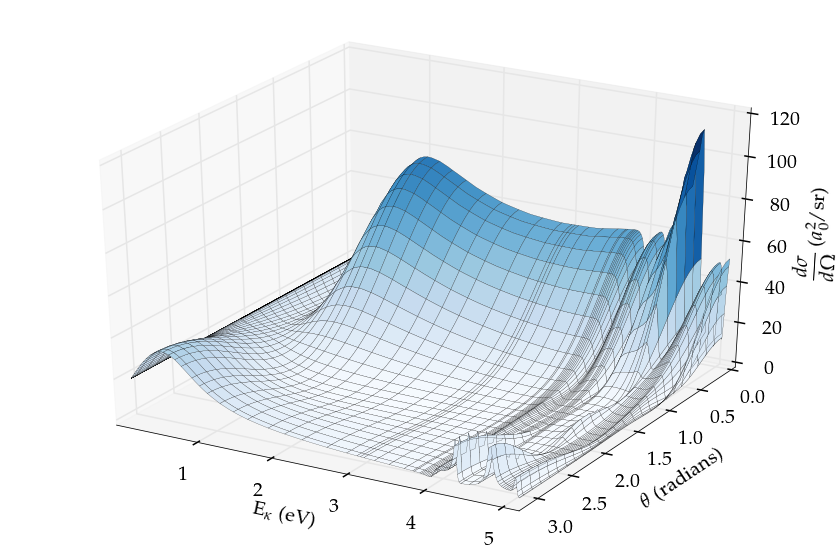

In [22]:
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)
zs1 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
zs = zs1
Z = zs.reshape(X.shape)

#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.1, antialiased=True, cmap=cm.Blues)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)
#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.gray)
#ax.plot_surface(X, Y, Z, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'${\rm{E}}_\kappa$ (eV)', fontsize=20, labelpad=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_zlabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(0, 3.2)
ax.set_ylim3d(3.2, 0)

plt.tight_layout()
plt.savefig("diff-cross-sections-singlet.pdf", bbox_inches='tight')

plt.show()

In [23]:
Z.max()

110.50391642476534

#### Triplet

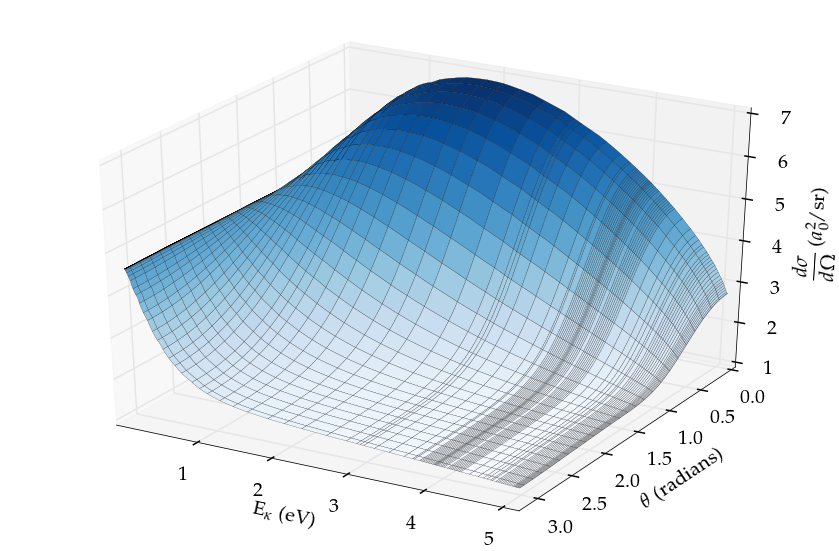

In [24]:
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)
zs3 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
zs = zs3
Z = zs.reshape(X.shape)

#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.1, antialiased=True, cmap=cm.Blues)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)
#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.gray)
#ax.plot_surface(X, Y, Z, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'${\rm{E}}_\kappa$ (eV)', fontsize=20, labelpad=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_zlabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(0, 3.2)
ax.set_ylim3d(3.2, 0)

plt.tight_layout()
plt.savefig("diff-cross-sections-triplet.pdf", bbox_inches='tight')

plt.show()

#### Singlet + Triplet

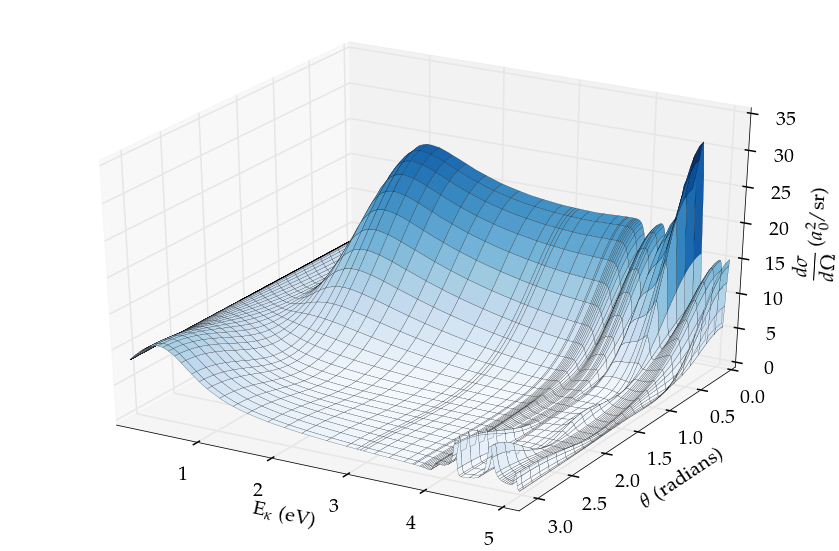

In [25]:
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)
# Already calculated these two above
#zs1 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
#zs3 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
zs = 0.25*zs1 + 0.75*zs3
Z = zs.reshape(X.shape)

#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.1, antialiased=True, cmap=cm.Blues)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)
#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.gray)
#ax.plot_surface(X, Y, Z, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'${\rm{E}}_\kappa$ (eV)', fontsize=20, labelpad=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_zlabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(0, 3.2)
ax.set_ylim3d(3.2, 0)

plt.tight_layout()
plt.savefig("diff-cross-sections-combined.pdf", bbox_inches='tight')
plt.show()

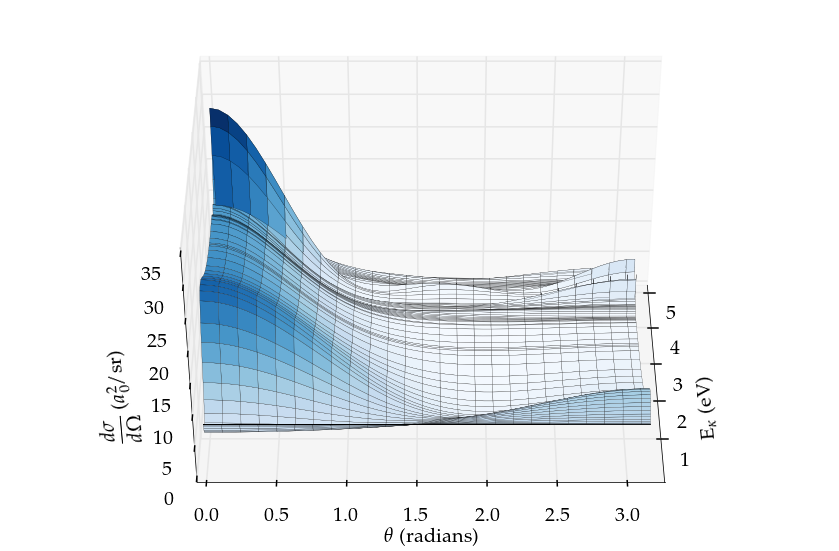

In [26]:
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)
# Already calculated these two above
#zs1 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
#zs3 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
zs = 0.25*zs1 + 0.75*zs3
Z = zs.reshape(X.shape)

#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.1, antialiased=True, cmap=cm.Blues)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)
#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.gray)
#ax.plot_surface(X, Y, Z, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(0, 3.2)
ax.set_ylim3d(3.2, 0)
ax.view_init(elev=40, azim=180)
#ax.view_init(elev=40, azim=110)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=20, rotation=95)
ax.xaxis.set_rotate_label(False)
ax.set_xlabel(r'${\rm{E}}_\kappa$ (eV)', fontsize=20, labelpad=20, rotation=95)

plt.tight_layout()
plt.savefig("diff-cross-sections-combined-1.pdf", bbox_inches='tight')

plt.show()

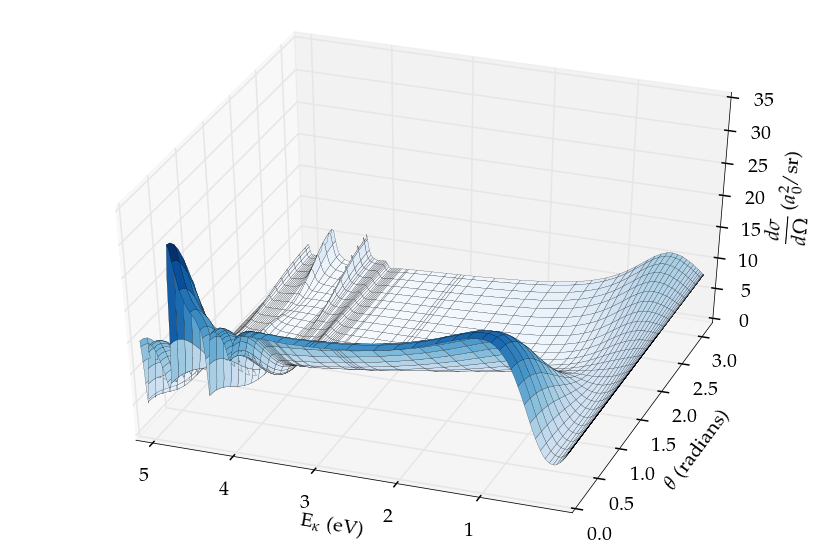

In [27]:
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)
# Already calculated these two above
#zs1 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
#zs3 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
zs = 0.25*zs1 + 0.75*zs3
Z = zs.reshape(X.shape)

#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.1, antialiased=True, cmap=cm.Blues)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)
#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.gray)
#ax.plot_surface(X, Y, Z, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'${\rm{E}}_\kappa$ (eV)', fontsize=20, labelpad=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_zlabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(0, 3.2)
ax.set_ylim3d(3.2, 0)
#ax.view_init(elev=40, azim=180)
ax.view_init(elev=40, azim=110)

plt.tight_layout()
plt.savefig("diff-cross-sections-combined-2.pdf", bbox_inches='tight')

plt.show()

8.11243824898 0.0001 6.8028462625e-08
8.11291022653 0.0001 6.8028462625e-08
8.10794065921 0.0001 6.8028462625e-08


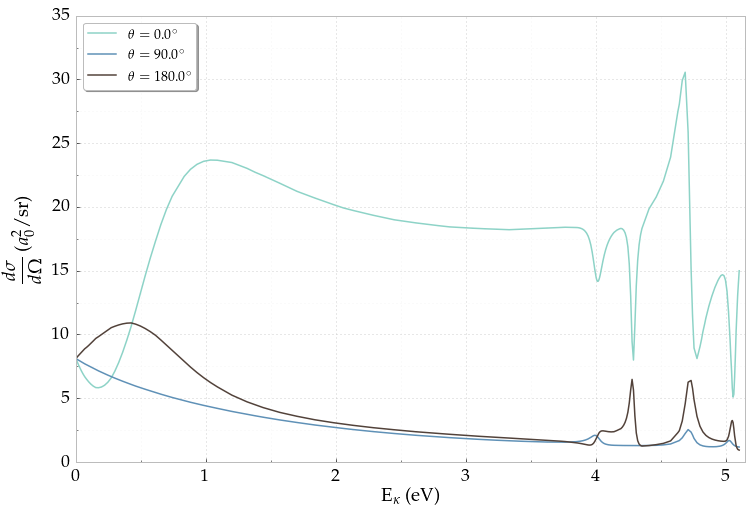

In [28]:
theta = (0, pi/2, pi)
#plotcol = ('steelblue', '#99CC66', 'coral')
#plotcol = ("#8dd3c7", "#377eb8", "#52423A")
plotcol = ("#8dd3c7", '#5F91B7', "#52423A")
plotsty = ('-', '-', ':')

lmax = 5  # Through the H-wave

pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)")

for j, t in enumerate(theta):
    diff_cross = []
    for i in range(np.size(kappasub)):
        k = kappasub[i]
        d1 = DifferentialCrossSingle(k, t, kappasub, lmax, interp_phase1)
        d3 = DifferentialCrossSingle(k, t, kappasub, lmax, interp_phase3)
        diff_cross = np.append(diff_cross, 0.25*d1 + 0.75*d3)
    kappalabel = r'$\theta = ' + str(t*180/pi) + r'^{\circ}$'
    print diff_cross[0], kappasub[0], ktoE(kappasub[0])
    #pyplot.plot(ktoE(kappasub), diff_cross, plotsty[j], marker='.', markersize=0.01, label=kappalabel, color=plotcol[j])
    line, = pyplot.plot(ktoE(kappasub), diff_cross, marker='.', markersize=0.01, label=kappalabel, color=plotcol[j])
    #if j == 2:
    #    line.set_dashes([12, 2, 4, 2]) 

pyplot.legend()
pyplot.xlim([0,5.15])
FixPlot(plt)
#pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=22)
pyplot.savefig("diff-cross-section-2D-theta.pdf", bbox_inches='tight')
pyplot.show()

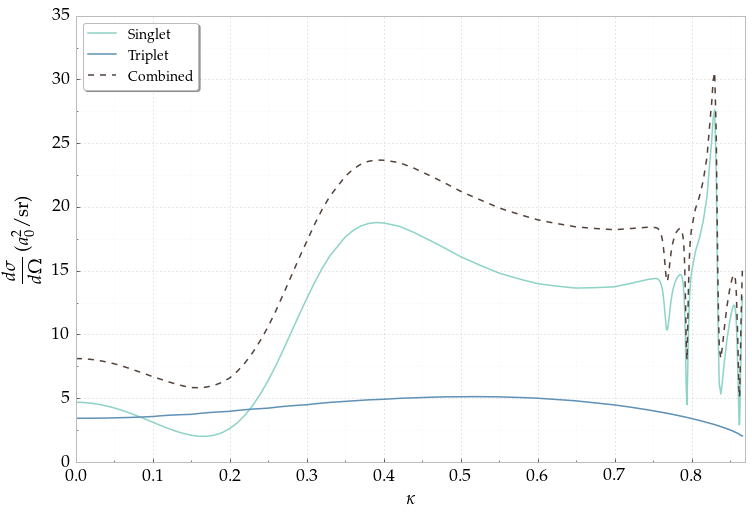

In [29]:
theta = 0
plotcol = ("#8dd3c7", '#5F91B7', "#52423A")

lmax = 5  # Through the H-wave

pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.xlabel(r"$\kappa$")
pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)")

diff_cross1 = []
diff_cross3 = []
for i in range(np.size(kappasub)):
    k = kappasub[i]
    d1 = DifferentialCrossSingle(k, theta, kappasub, lmax, interp_phase1)
    d3 = DifferentialCrossSingle(k, theta, kappasub, lmax, interp_phase3)
    diff_cross1 = np.append(diff_cross1, 0.25*d1)
    diff_cross3 = np.append(diff_cross3, 0.75*d3)
diff_cross = diff_cross1+diff_cross3
pyplot.plot(kappasub, diff_cross1, marker='.', markersize=0.01, label='Singlet', color=plotcol[0])
pyplot.plot(kappasub, diff_cross3, marker='.', markersize=0.01, label='Triplet', color=plotcol[1])
pyplot.plot(kappasub, diff_cross, marker='.', markersize=0.01, label='Combined', ls='dashed', color=plotcol[2])

pyplot.legend()
pyplot.xlim([0,0.87])
#pyplot.xlim([0,5.15])
FixPlot(plt)
#pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=22)
pyplot.savefig("diff-cross-0-vskappa.pdf", bbox_inches='tight')
pyplot.show()

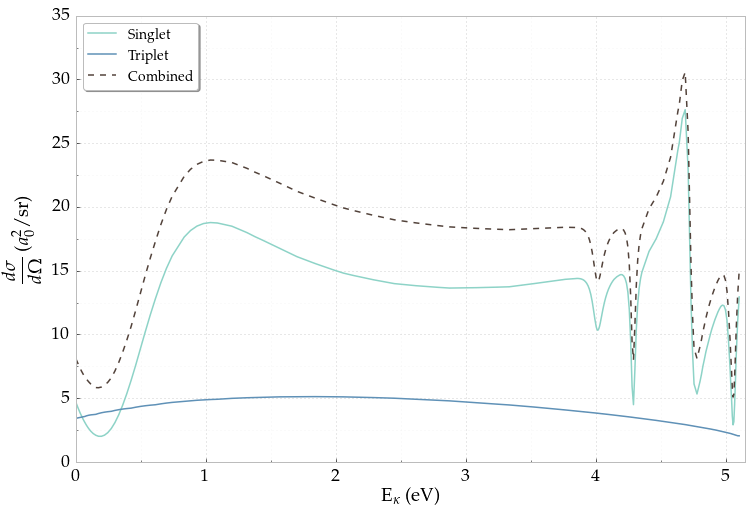

In [30]:
theta = 0
plotcol = ("#8dd3c7", '#5F91B7', "#52423A")

lmax = 5  # Through the H-wave

pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)")

diff_cross1 = []
diff_cross3 = []
for i in range(np.size(kappasub)):
    k = kappasub[i]
    d1 = DifferentialCrossSingle(k, theta, kappasub, lmax, interp_phase1)
    d3 = DifferentialCrossSingle(k, theta, kappasub, lmax, interp_phase3)
    diff_cross1 = np.append(diff_cross1, 0.25*d1)
    diff_cross3 = np.append(diff_cross3, 0.75*d3)
diff_cross = diff_cross1+diff_cross3
pyplot.plot(ktoE(kappasub), diff_cross1, marker='.', markersize=0.01, label='Singlet', color=plotcol[0])
pyplot.plot(ktoE(kappasub), diff_cross3, marker='.', markersize=0.01, label='Triplet', color=plotcol[1])
pyplot.plot(ktoE(kappasub), diff_cross, marker='.', markersize=0.01, label='Combined', ls='dashed', color=plotcol[2])

pyplot.legend()
#pyplot.xlim([0,0.866])
pyplot.xlim([0,5.15])
FixPlot(plt)
#pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=22)
pyplot.savefig("diff-cross-0-vsE.pdf", bbox_inches='tight')
pyplot.show()

In [31]:
a = np.array([kappasub, diff_cross1, diff_cross3])
np.transpose(a)

array([[  1.00000000e-04,   4.68471110e+00,   3.42772715e+00],
       [  2.00000000e-04,   4.68471007e+00,   3.42772630e+00],
       [  3.00000000e-04,   4.68470790e+00,   3.42772712e+00],
       [  4.00000000e-04,   4.68470493e+00,   3.42772549e+00],
       [  5.00000000e-04,   4.68470108e+00,   3.42772732e+00],
       [  6.00000000e-04,   4.68469612e+00,   3.42772781e+00],
       [  7.00000000e-04,   4.68469051e+00,   3.42772470e+00],
       [  8.00000000e-04,   4.68468374e+00,   3.42772734e+00],
       [  9.00000000e-04,   4.68467656e+00,   3.42772774e+00],
       [  1.00000000e-03,   4.68466820e+00,   3.42772842e+00],
       [  2.00000000e-03,   4.68453855e+00,   3.42772433e+00],
       [  3.00000000e-03,   4.68358884e+00,   3.42772325e+00],
       [  4.00000000e-03,   4.68228414e+00,   3.42781863e+00],
       [  5.00000000e-03,   4.68060601e+00,   3.42794013e+00],
       [  6.00000000e-03,   4.67855448e+00,   3.42808758e+00],
       [  7.00000000e-03,   4.67613115e+00,   3.4282671

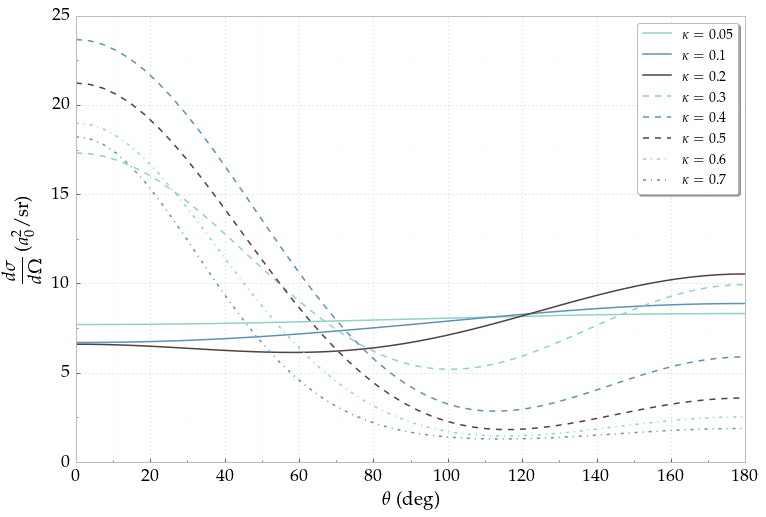

In [32]:
#ki = (0.05, 0.1, 0.15, 0.2, 0.25, 0.26, 0.27, 0.28, 0.3, 0.4, 0.5, 0.6, 0.7)
ki = (0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7)
colors = ('#52423A', "#8dd3c7", '#5F91B7')

lmax = 5  # Through the H-wave
#Ntheta1 = 100
Ntheta1 = Ntheta
theta = np.linspace(0, pi, Ntheta1)
#theta = np.array((1.0, 1.1))
#Ntheta1 = np.size(theta)

#pyplot.figure(1, figsize=(12,10))

#pyplot.title(r"$^1S$ versus E for $\theta = $" + str(theta))
pyplot.xlabel(r"$\theta$ (deg)")
pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$  ($a_0^2/$sr)")
#pyplot.legend(prop={'size':6})

idx = 0
for k in ki:
    diff_cross = []
    for i in range(Ntheta1):
        d1 = DifferentialCrossSingle(k, theta[i], kappasub, lmax, interp_phase1)
        d3 = DifferentialCrossSingle(k, theta[i], kappasub, lmax, interp_phase3)
        diff_cross = np.append(diff_cross, 0.25*d1 + 0.75*d3)
        #diff_cross = np.append(diff_cross, d3)
    #kappalabel = r'$\kappa = ' + str(k) + r' / E = ' + "{0:.2f}".format(ktoE(k)) + r'$'
    kappalabel = r'$\kappa = ' + str(k) + r'$'
    if idx < 3:
        lsty = 'solid'
    elif idx < 6:
        lsty = 'dashed'
    else:
        lsty = '-.'
    idx += 1
    #pyplot.plot(theta*180/pi, diff_cross, marker='.', markersize=0.01, label=kappalabel, ls=lsty, color=colors[idx%3])
    pyplot.plot(theta*180/pi, diff_cross, label=kappalabel, ls=lsty, color=colors[idx%3])
    #print diff_cross[0]

#pyplot.legend(loc='upper right', shadow=True, prop={'size':14})
pyplot.legend()
FixPlot(plt)
#pyplot.xlim([0, 3.2])
pyplot.savefig("diff-cross-section-2D-kappa.pdf", bbox_inches='tight')
pyplot.show()

### Maximum Percentages for $\frac{d\sigma}{d\Omega}$

In [33]:
#Ntheta = 50
lmax = 5

Zarrays = []
for l in range(lmax+1):
    theta = np.linspace(0, pi, Ntheta)
    x = Esub
    y = theta.copy()
    X, Y = np.meshgrid(x, y)
    zs1 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),l,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
    zs3 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),l,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
    zs = 0.25*zs1 + 0.75*zs3
    Z = zs.reshape(X.shape)
    #Zarrays.append(Z.ravel())
    Zarrays.append(Z)

In [34]:
print "Maximum percent differences"
print "P-wave: ", PercentDiff(Zarrays[0], Zarrays[1]).max()
print "D-wave: ", PercentDiff(Zarrays[1], Zarrays[2]).max()
print "F-wave: ", PercentDiff(Zarrays[2], Zarrays[3]).max()
print "G-wave: ", PercentDiff(Zarrays[3], Zarrays[4]).max()
print "H-wave: ", PercentDiff(Zarrays[4], Zarrays[5]).max()
print
print "Average percent differences"
print "P-wave: ", PercentDiff(Zarrays[0], Zarrays[1]).mean()
print "D-wave: ", PercentDiff(Zarrays[1], Zarrays[2]).mean()
print "F-wave: ", PercentDiff(Zarrays[2], Zarrays[3]).mean()
print "G-wave: ", PercentDiff(Zarrays[3], Zarrays[4]).mean()
print "H-wave: ", PercentDiff(Zarrays[4], Zarrays[5]).mean()

Maximum percent differences
P-wave:  140.827946273
D-wave:  122.640498224
F-wave:  58.0072181677
G-wave:  12.1109824322
H-wave:  3.78226180857

Average percent differences
P-wave:  49.1090736349
D-wave:  18.5352006886
F-wave:  4.49590554287
G-wave:  0.863094845619
H-wave:  0.256201025383


In [35]:
df['E']

0     6.802846e-08
1     2.721139e-07
2     6.122562e-07
3     1.088455e-06
4     1.700712e-06
5     2.449025e-06
6     3.333395e-06
7     4.353822e-06
8     5.510305e-06
9     6.802846e-06
10    2.721139e-05
11    6.122562e-05
12    1.088455e-04
13    1.700712e-04
14    2.449025e-04
...
177    5.019691
178    5.025536
179    5.031385
180    5.037237
181    5.043093
182    5.048952
183    5.054814
184    5.060680
185    5.066549
186    5.072422
187    5.078298
188    5.084177
189    5.090060
190    5.095946
191    5.101835
Name: E, Length: 192, dtype: float64

In [36]:
theta

array([ 0.        ,  0.06411414,  0.12822827,  0.19234241,  0.25645654,
        0.32057068,  0.38468481,  0.44879895,  0.51291309,  0.57702722,
        0.64114136,  0.70525549,  0.76936963,  0.83348377,  0.8975979 ,
        0.96171204,  1.02582617,  1.08994031,  1.15405444,  1.21816858,
        1.28228272,  1.34639685,  1.41051099,  1.47462512,  1.53873926,
        1.60285339,  1.66696753,  1.73108167,  1.7951958 ,  1.85930994,
        1.92342407,  1.98753821,  2.05165235,  2.11576648,  2.17988062,
        2.24399475,  2.30810889,  2.37222302,  2.43633716,  2.5004513 ,
        2.56456543,  2.62867957,  2.6927937 ,  2.75690784,  2.82102197,
        2.88513611,  2.94925025,  3.01336438,  3.07747852,  3.14159265])

#Zarrays[4][:,0], Zarrays[4][0]
np.size(pd[:,0])
pd[:,191]

pyplot.plot(theta, pd[:,191])
pyplot.show()

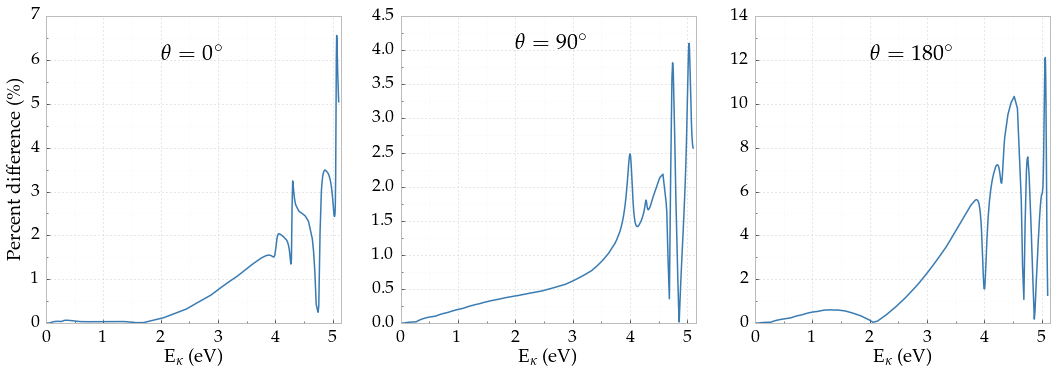

In [37]:
pd = PercentDiff(Zarrays[3], Zarrays[4])
fig = pyplot.figure(figsize=(18, 5.5))

# Theta = 0
pyplot.subplot(1, 3, 1)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"Percent difference (\%)")
pyplot.xlim([0,5.15])
pyplot.plot(Esub, pd[0], color=singletcolor)
ax = plt.gca()
ax.text(2.0, 6, r'$\theta = 0^\circ$', fontsize=22)
FixPlot(plt)

# Theta \approx 90
pyplot.subplot(1, 3, 2)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.xlim([0,5.15])
pyplot.plot(Esub, pd[24], color=singletcolor)
ax = plt.gca()
ax.text(2.0, 4.0, r'$\theta = 90^\circ$', fontsize=22)
FixPlot(plt)

# Theta = 180
pyplot.subplot(1, 3, 3)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.xlim([0,5.15])
pyplot.plot(Esub, pd[49], color=singletcolor)
ax = plt.gca()
ax.text(2.0, 12, r'$\theta = 180^\circ$', fontsize=22)
FixPlot(plt)

plt.savefig("percent-diff-cross-sections-g.pdf", bbox_inches='tight')
pyplot.show()

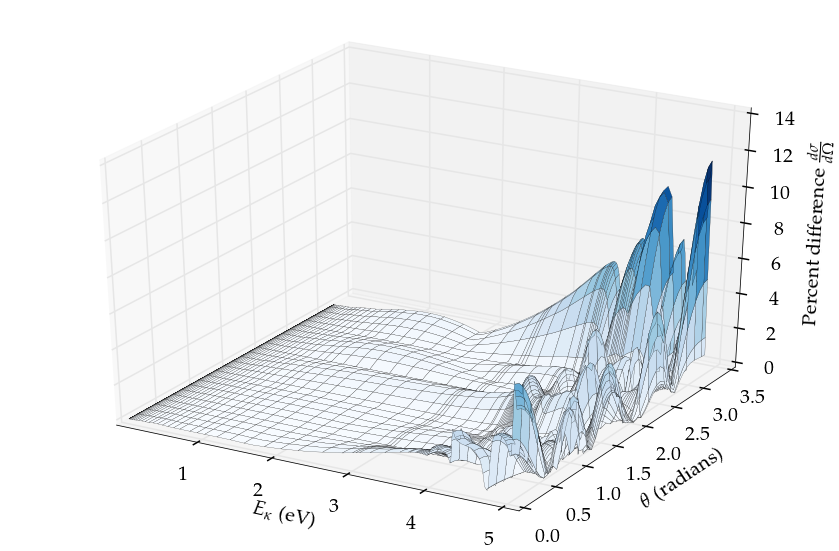

In [38]:
#Ntheta = 50
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, pd, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'$E_\kappa$ (eV)', fontsize=20, labelpad=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_zlabel(r"Percent difference $\frac{d\sigma}{d\Omega}$", fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(3.2, 0)

plt.tight_layout()
plt.savefig("percent-diff-cross-sections-full-g.pdf", bbox_inches='tight')

plt.show()

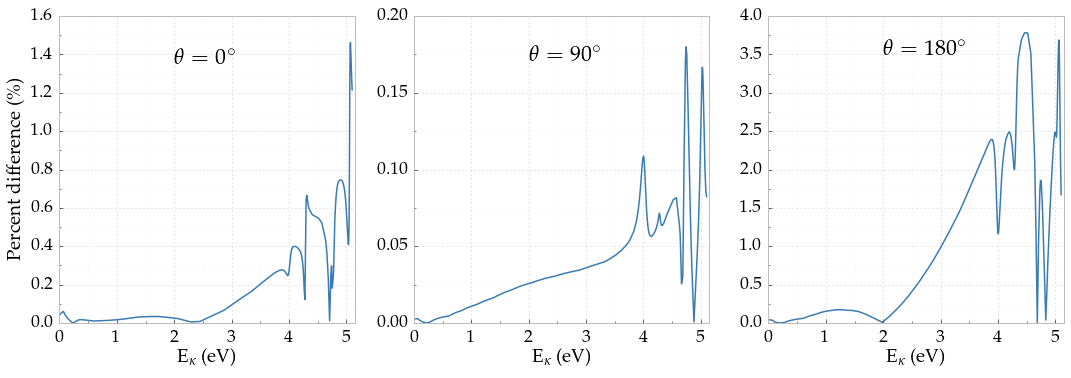

In [39]:
pd = PercentDiff(Zarrays[4], Zarrays[5])
fig = pyplot.figure(figsize=(18, 5.5))

# Theta = 0
pyplot.subplot(1, 3, 1)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"Percent difference (\%)")
pyplot.xlim([0,5.15])
pyplot.plot(Esub, pd[0], color=singletcolor)
ax = plt.gca()
ax.text(2.0, 1.35, r'$\theta = 0^\circ$', fontsize=22)
FixPlot(plt)

# Theta \approx 90
pyplot.subplot(1, 3, 2)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.xlim([0,5.15])
pyplot.plot(Esub, pd[24], color=singletcolor)
ax = plt.gca()
ax.text(2.0, 0.17, r'$\theta = 90^\circ$', fontsize=22)
FixPlot(plt)

# Theta = 180
pyplot.subplot(1, 3, 3)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.xlim([0,5.15])
pyplot.plot(Esub, pd[49], color=singletcolor)
ax = plt.gca()
ax.text(2.0, 3.5, r'$\theta = 180^\circ$', fontsize=22)
FixPlot(plt)

plt.savefig("percent-diff-cross-sections-h.pdf", bbox_inches='tight')
pyplot.show()

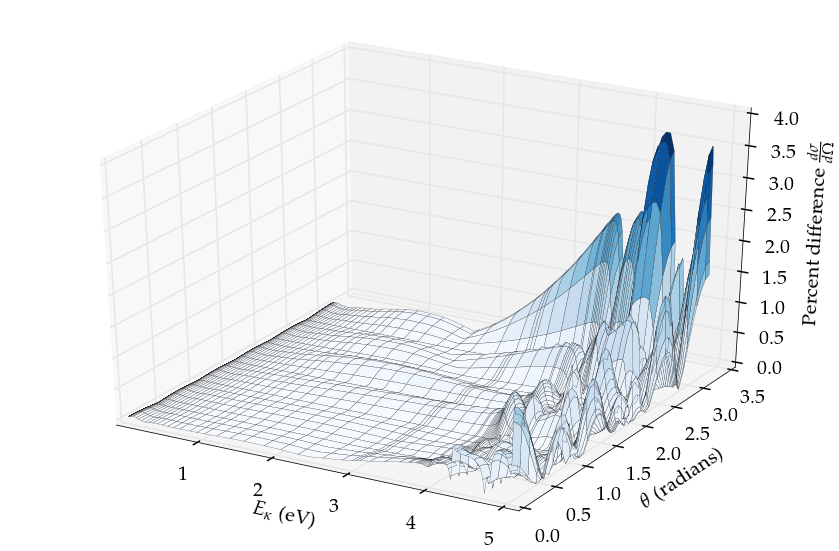

In [40]:
#Ntheta = 50
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, pd, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'$E_\kappa$ (eV)', fontsize=20, labelpad=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_zlabel(r"Percent difference $\frac{d\sigma}{d\Omega}$", fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(3.2, 0)

plt.tight_layout()
plt.savefig("percent-diff-cross-sections-full-h.pdf", bbox_inches='tight')

plt.show()

### Maximum and Average Percentages for $\frac{d\sigma}{d\Omega}$: Singlet vs. Triplet

In [41]:
#Ntheta = 50
lmax = 5

Zarrays = []
Z1arrays = []
Z3arrays = []
for l in range(lmax+1):
    theta = np.linspace(0, pi, Ntheta)
    x = Esub
    y = theta.copy()
    X, Y = np.meshgrid(x, y)
    zs1 = 0.25*np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),l,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
    zs3 = 0.75*np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),l,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
    zs = zs1 + zs3
    Z = zs.reshape(X.shape)
    Z1 = zs1.reshape(X.shape)
    Z3 = zs3.reshape(X.shape)
    #Zarrays.append(Z.ravel())
    Zarrays.append(Z)
    Z1arrays.append(Z1)
    Z3arrays.append(Z3)

In [42]:
print "Singlet"
for l in range(lmax+1):
    a = PercentDiff(Zarrays[5], Z1arrays[l]+Z3arrays[5])
    if l < lmax:
        print l, ":", a.max(), X.flatten()[a.argmax()], Y.flatten()[a.argmax()]
    else:
        print l, ":", a.max()

print
print "Triplet"
for l in range(lmax+1):
    a = PercentDiff(Zarrays[5], Z1arrays[5]+Z3arrays[l])
    if l < lmax:
        print l, ":", a.max(), X.flatten()[a.argmax()], Y.flatten()[a.argmax()]
    else:
        print l, ":", a.max()

Singlet
0 : 162.279730225 4.68648079024 0.0
1 : 121.892321637 4.68648079024 0.0
2 : 51.8909431913 5.07242156511 3.14159265359
3 : 9.22434534959 5.06654900808 0.0
4 : 3.1467097894 5.06067985246 3.14159265359
5 : 0.0

Triplet
0 : 50.1131383606 4.28875918635 0.705255493663
1 : 24.717021581 4.353821608 3.14159265359
2 : 3.30529801293 5.10183537164 3.14159265359
3 : 1.47797733075 5.05481409827 0.0
4 : 1.63762763263 4.353821608 3.14159265359
5 : 0.0


In [43]:
print "Singlet"
for l in range(lmax+1):
    print l, ":", PercentDiff(Zarrays[5], Z1arrays[l]+Z3arrays[5]).mean()

print
print "Triplet"
for l in range(lmax+1):
    print l, ":", PercentDiff(Zarrays[5], Z1arrays[5]+Z3arrays[l]).mean()

Singlet
0 : 40.3384617936
1 : 17.548341076
2 : 4.47131412314
3 : 0.797374260778
4 : 0.208491037045
5 : 0.0

Triplet
0 : 9.8409652893
1 : 3.31406797561
2 : 0.394375053315
3 : 0.203252210665
4 : 0.154879407634
5 : 0.0


In [44]:
Z1arrays[0]

array([[ 4.68852818,  4.68852716,  4.68852498, ...,  0.05970905,
         0.06879129,  0.07702139],
       [ 4.68852818,  4.68852716,  4.68852498, ...,  0.05970905,
         0.06879129,  0.07702139],
       [ 4.68852818,  4.68852716,  4.68852498, ...,  0.05970905,
         0.06879129,  0.07702139],
       ..., 
       [ 4.68852818,  4.68852716,  4.68852498, ...,  0.05970905,
         0.06879129,  0.07702139],
       [ 4.68852818,  4.68852716,  4.68852498, ...,  0.05970905,
         0.06879129,  0.07702139],
       [ 4.68852818,  4.68852716,  4.68852498, ...,  0.05970905,
         0.06879129,  0.07702139]])

## Scattering Amplitude

This shows the optical theorem when $\theta = 0$.

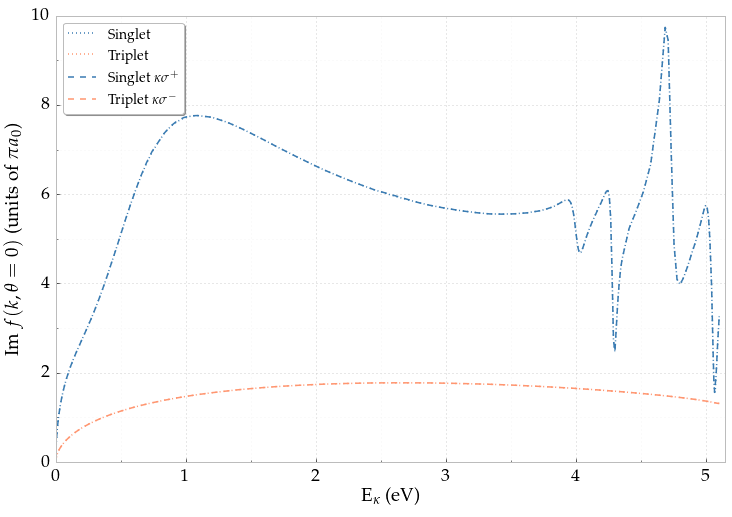

In [45]:
theta = (0, pi/2, pi)
plotcol = ('steelblue', '#99CC66', 'coral')
plotsty = ('-', '-', ':')

lmax = 5  # Through the H-wave

pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\rm{Im }$ $f(k,\theta=0)$ (units of $\pi a_0$)")

scatamp1 = []
scatamp3 = []
for i in range(np.size(kappasub)):
    k = kappasub[i]
    sa1 = 0
    sa3 = 0
    for l in range(lmax+1):
        sa1 += 1 / k * (2*l+1) * sin(interp_phase1[l][i])**2
        sa3 += 1 / k * (2*l+1) * sin(interp_phase3[l][i])**2
    scatamp1 = np.append(scatamp1, sa1)
    scatamp3 = np.append(scatamp3, sa3)
pyplot.plot(ktoE(kappasub), scatamp1, '-', marker='.', markersize=0.01, label=r"Singlet", color=singletcolor, ls='dotted')
pyplot.plot(ktoE(kappasub), scatamp3, '-', marker='.', markersize=0.01, label=r"Triplet", color=tripletcolor, ls='dotted')

pyplot.plot(df['E'], df['Kappa']/4*(1/0.25)*df['Cross1'], '-', marker='.', markersize=0.01, label=r'Singlet $\kappa \sigma^+$', color=singletcolor, ls='dashed')
pyplot.plot(df['E'], df['Kappa']/4*(1/0.75)*df['Cross3'], '-', marker='.', markersize=0.01, label=r'Triplet $\kappa \sigma^-$', color=tripletcolor, ls='dashed')

pyplot.legend()
pyplot.xlim([0,5.15])
FixPlot(plt)
pyplot.savefig("scattering-amplitude-0.pdf", bbox_inches='tight')
pyplot.show()

In [46]:
def ScatAmpSingle(kappa, theta, kappalist, lmax, interp_phase):
    """ The differential cross sections for a given value of kappa also depend on theta.
        This function returns a value with respect to kappa for a given theta. """
    #@TODO: Make this general for both the singlet and the triplet.

    phases = []
    for l in range(lmax+1):
        phases = np.append(phases, GetSubset(kappalist, [kappa], interp_phase[l]))
    #print phases
    
    sa = 0.0
    for l in range(lmax+1):
        sa = sa + 1/kappa * (2*l+1) * np.cos(phases[l]) * np.sin(phases[l]) * eval_legendre(l, np.cos(theta))
            
    return sa

In [47]:
def ScatAmpSingleImag(kappa, theta, kappalist, lmax, interp_phase):
    """ The differential cross sections for a given value of kappa also depend on theta.
        This function returns a value with respect to kappa for a given theta. """
    #@TODO: Make this general for both the singlet and the triplet.

    phases = []
    for l in range(lmax+1):
        phases = np.append(phases, GetSubset(kappalist, [kappa], interp_phase[l]))
    #print phases
    
    sa = 0.0
    for l in range(lmax+1):
        sa = sa + 1/kappa * (2*l+1) * np.sin(phases[l]) * np.sin(phases[l]) * eval_legendre(l, np.cos(theta))
            
    return sa

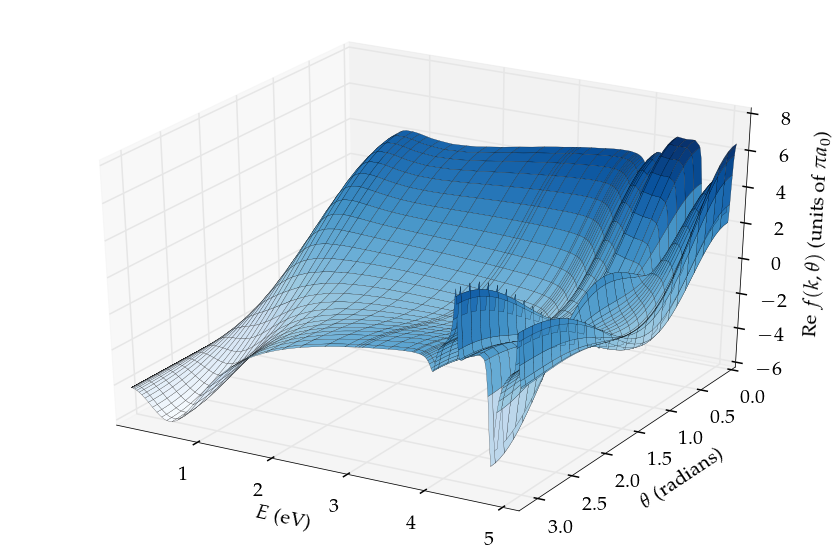

In [48]:
#Ntheta = 50
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)
zs1 = np.array([ScatAmpSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
#zs3 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
#zs = 0.25*zs1 + 0.75*zs3
zs = zs1
Z = zs.reshape(X.shape)

#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.1, antialiased=True, cmap=cm.Blues)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)
#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.gray)
#ax.plot_surface(X, Y, Z, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'$E$ (eV)', fontsize=20, labelpad=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_zlabel(r"Re $f(k,\theta)$ (units of $\pi a_0$)", fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(0, 3.2)
ax.set_ylim3d(3.2, 0)

plt.tight_layout()
plt.savefig("scattering-amplitude-real.pdf", bbox_inches='tight')

plt.show()

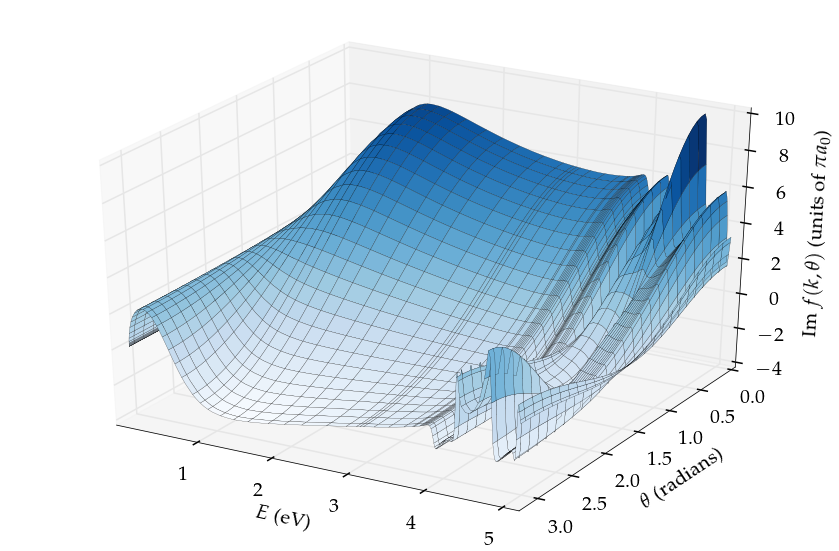

In [49]:
#Ntheta = 50
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)
zs1 = np.array([ScatAmpSingleImag(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
#zs3 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
#zs = 0.25*zs1 + 0.75*zs3
zs = zs1
Z = zs.reshape(X.shape)

#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.1, antialiased=True, cmap=cm.Blues)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)
#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.gray)
#ax.plot_surface(X, Y, Z, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'$E$ (eV)', fontsize=20, labelpad=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_zlabel(r"Im $f(k,\theta)$ (units of $\pi a_0$)", fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(0, 3.2)
ax.set_ylim3d(3.2, 0)

plt.tight_layout()
plt.savefig("scattering-amplitude-imag.pdf", bbox_inches='tight')

plt.show()

## Cleanup

In [50]:
db.close()

In [51]:
EndTime = datetime.datetime.now()
TimeDiff = EndTime - StartTime
print "Seconds: ", TimeDiff.seconds
print "Minutes: ", TimeDiff.seconds / 60.

Seconds:  625
Minutes:  10.4166666667
